In [1]:

pip install kmapper


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.0/126.0 kB 2.2 MB/s eta 0:00:00


In [2]:
pip install gudhi

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.3/3.3 MB 7.1 MB/s eta 0:00:00


In [3]:
!pip install giotto-tda

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 9.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 526.4/526.4 kB 13.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 452.9/452.9 kB 14.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.3/3.3 MB 21.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 24.6 MB/s eta 0:00:00


# Exploración de los datos

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import gudhi as gd
import seaborn as sns
import matplotlib.patches as mpatches
from sklearn.decomposition import PCA
from gtda.homology import VietorisRipsPersistence
from gtda.plotting import plot_diagram
import kmapper as km


df = pd.read_csv('https://raw.githubusercontent.com/kevingonzalezd/csv/main/wine-clustering.csv')
df

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740
174,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750
175,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835
176,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Alcohol               178 non-null    float64
 1   Malic_Acid            178 non-null    float64
 2   Ash                   178 non-null    float64
 3   Ash_Alcanity          178 non-null    float64
 4   Magnesium             178 non-null    int64  
 5   Total_Phenols         178 non-null    float64
 6   Flavanoids            178 non-null    float64
 7   Nonflavanoid_Phenols  178 non-null    float64
 8   Proanthocyanins       178 non-null    float64
 9   Color_Intensity       178 non-null    float64
 10  Hue                   178 non-null    float64
 11  OD280                 178 non-null    float64
 12  Proline               178 non-null    int64  
dtypes: float64(11), int64(2)
memory usage: 18.2 KB


In [6]:
df.describe()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


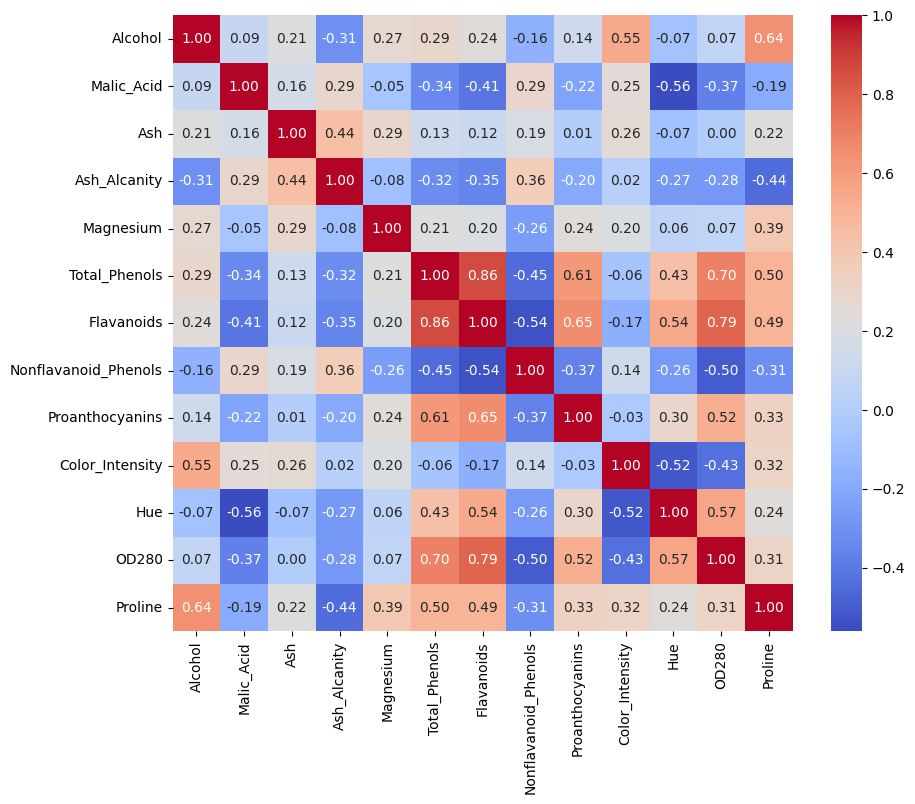

In [7]:
# Matriz de correlación
plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(), annot=True, fmt=".2f", cmap="coolwarm")
plt.show()

Gracias a la gráfica podemos observar algunas correlaciones importantes que más tarde vamos a estudiar, Total_Phenols y Flavonoids (0.86) es la correlación más alta visible en la matriz. Indica que los vinos con altos niveles de fenoles totales generalmente también presentan altos niveles de flavonoides. Flavonoids y OD280 (0.79) también es bastante alta, lo que muestra que los vinos con muchos flavonoides tienden a tener mayores lecturas en el OD280, un índice que mide la absorción de luz y está relacionado con la cantidad de compuestos fenólicos en el vino. tambien tenemso Proanthocyanidins y Flavonoids (0.65)
Magnesium y Proline (0.39)

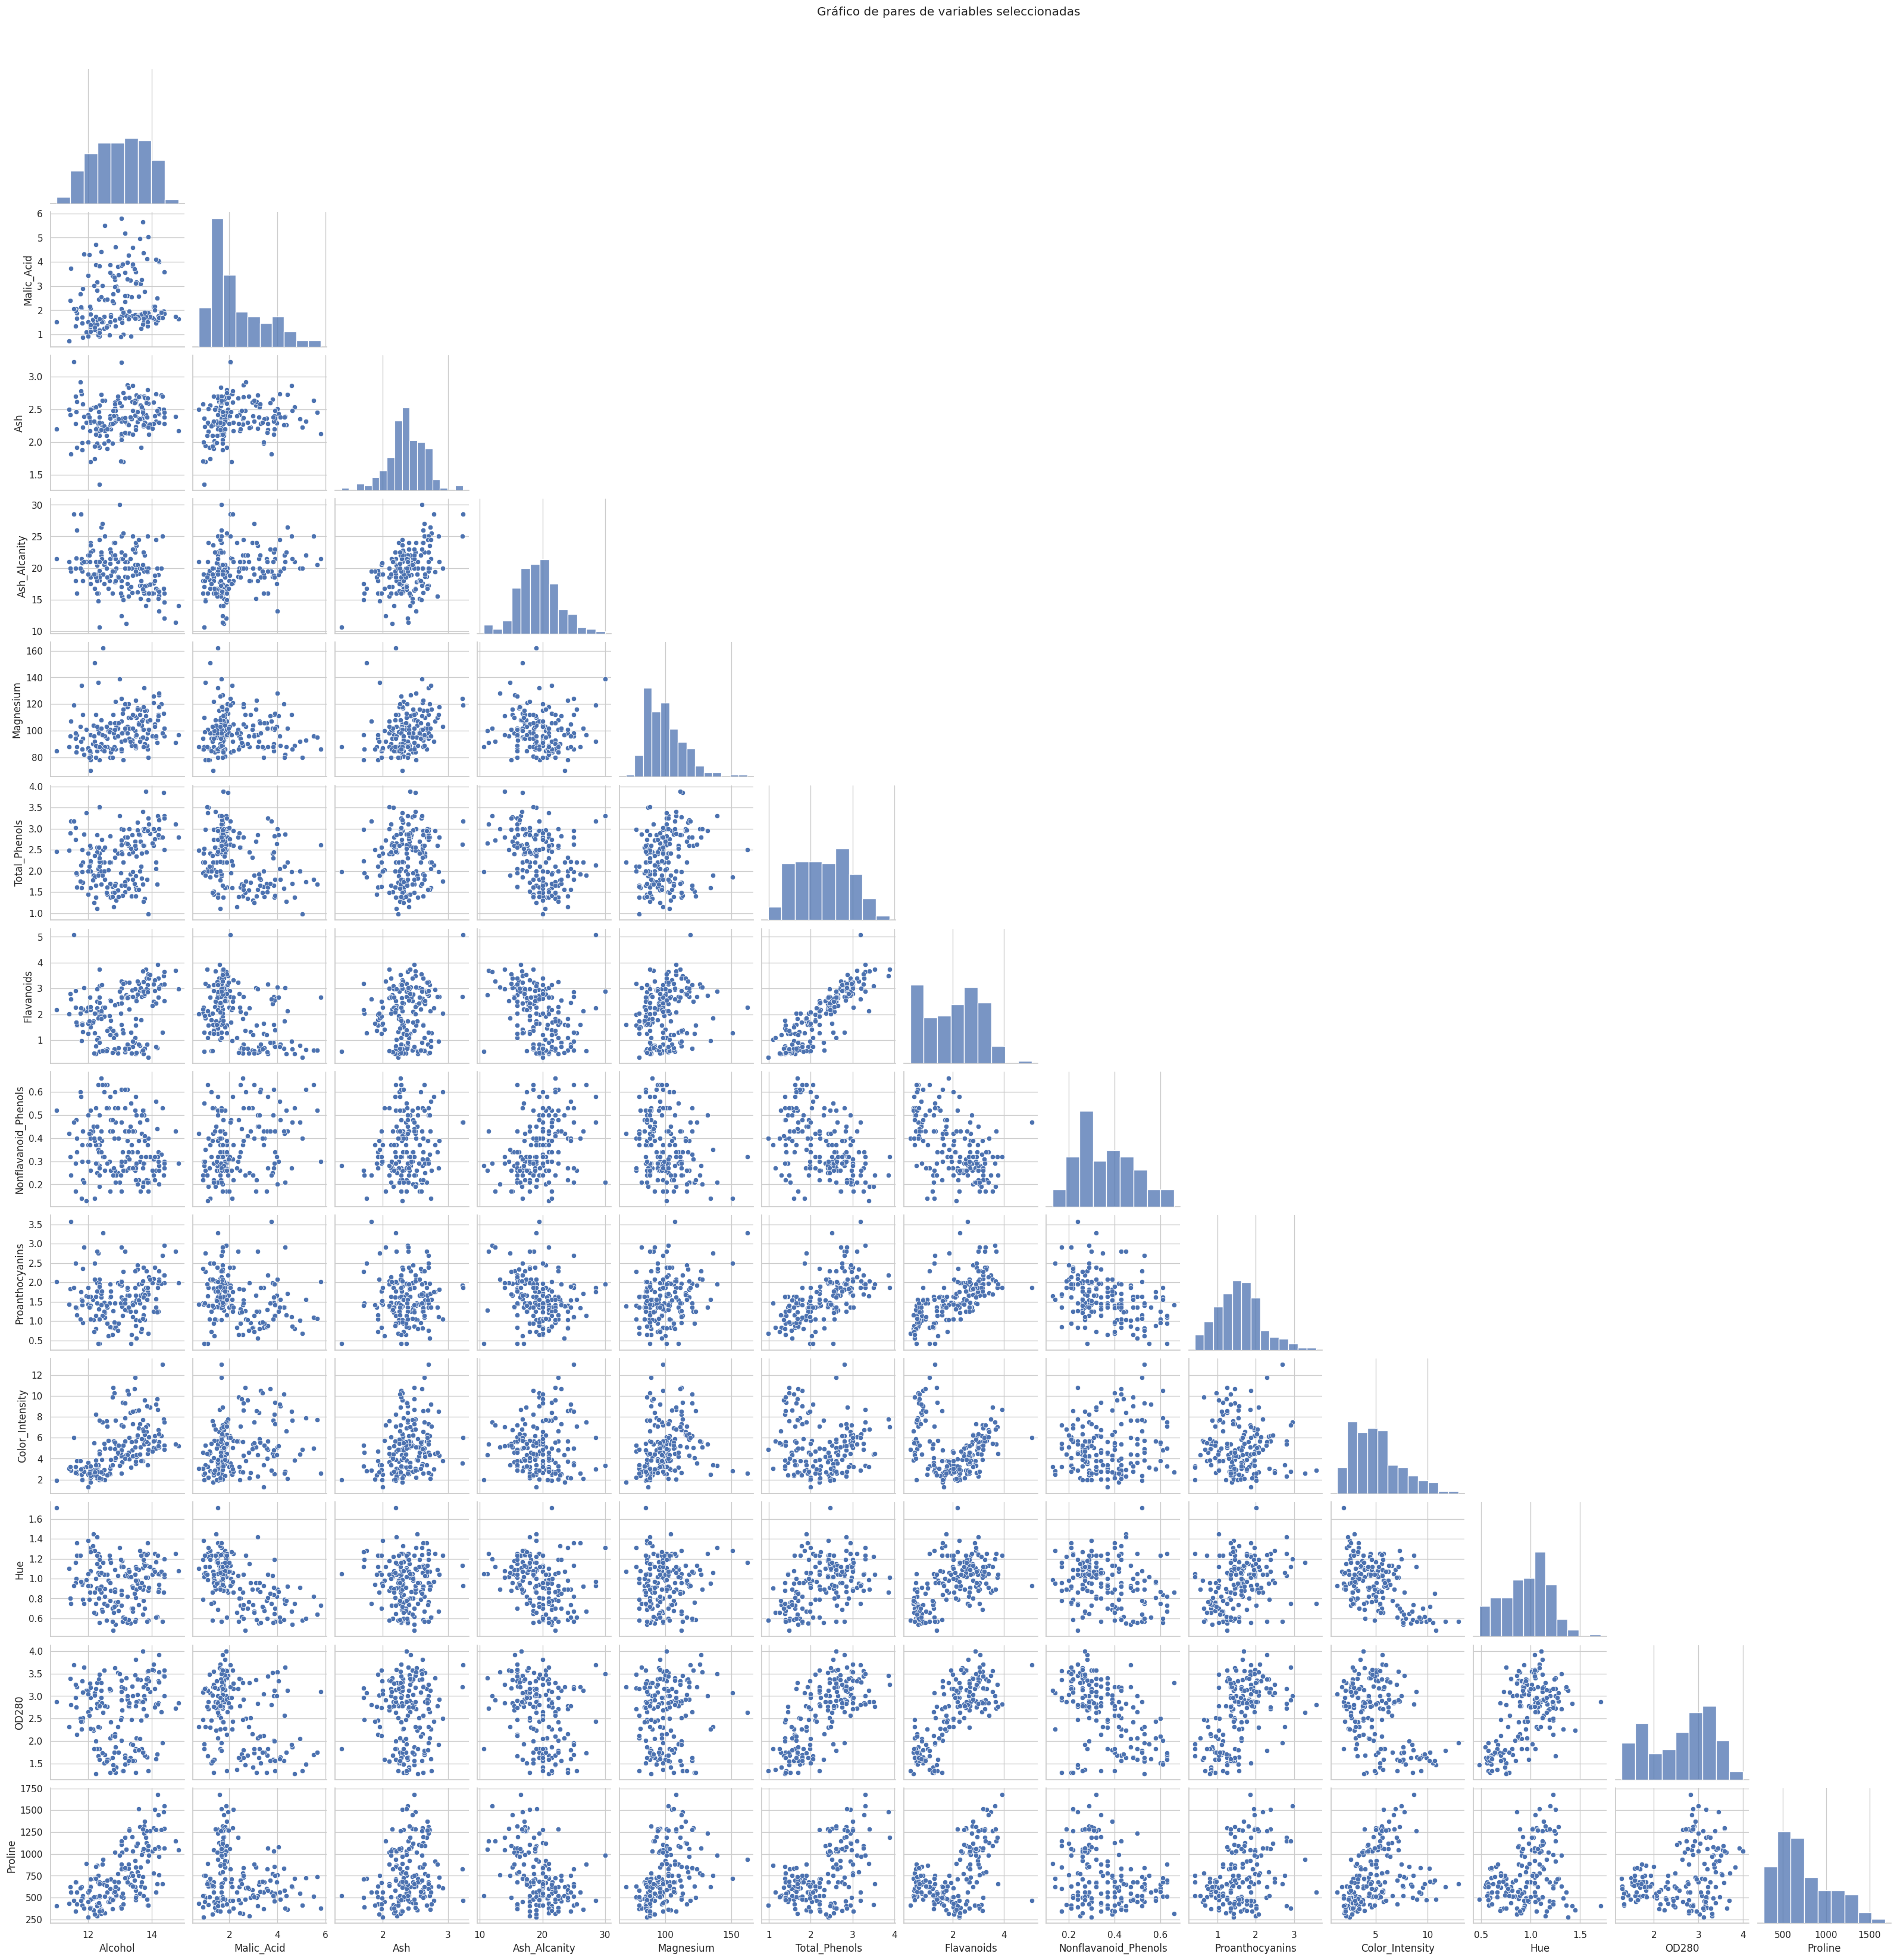

In [8]:
# Configuración del estilo de seaborn
sns.set(style="whitegrid")


# Gráficos de dispersión para algunas variables seleccionadas
sns.pairplot(df, corner=True)
plt.suptitle('Gráfico de pares de variables seleccionadas', y=1.02)
plt.show()


y en esta gráfica podemos observar las tendencias que analizadas en las correlaciones, como la de Flavonoids y OD280 que se ve como si siguieran una tendencia lineal los datos, conforme aumenta Flavonoids se observa un aumento en OD280 tambien

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:8

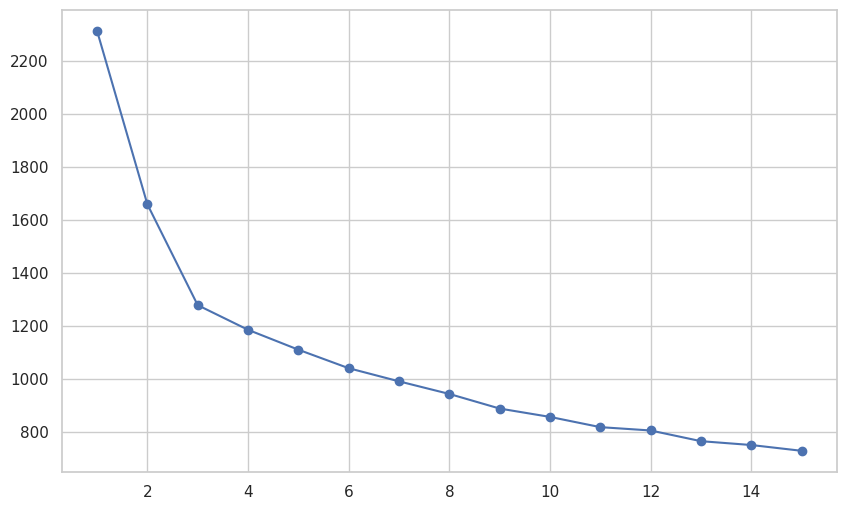

In [9]:


# Crear una instancia del escalador
scaler = StandardScaler()

# Ajustar y transformar los datos
df_normalized = scaler.fit_transform(df)

# Convertir de nuevo a DataFrame para mejor manejo en pasos futuros
df_normalized = pd.DataFrame(df_normalized, columns=df.columns)


def calculate_wss(data, k_max):
    wss = []
    for k in range(1, k_max+1):
        kmeans = KMeans(n_clusters=k, random_state=1234)
        kmeans.fit(data)
        wss.append(kmeans.inertia_)
    return wss

wss = calculate_wss(df_normalized, 15)
plt.figure(figsize=(10, 6))
plt.plot(range(1, 16), wss, marker='o')
plt.show()


 Usamos StandardScaler porque sino las variables con escalas más grandes podrían dominar el algoritmo y podría haber una interpretación sesgada de los clústeres. El método de la suma de los cuadrados dentro del clúster lo usé para determinar el número óptimo de clústeres en kmeans. Al graficar diferentes valores de K, se busca un codo donde ya no hayan cambios bruscos, lo que nos diría  que añadir más clústeres más allá de ese punto no mejora significativamente la variación total explicada. Y con el gráfico vemos que 3 clusters parece ser lo ideal y esos usaremos

In [11]:
# Ajustar la configuración de Mapper
mapper = km.KeplerMapper(verbose=1)

# Definir una función de lente utilizando PCA
lens = mapper.fit_transform(df_normalized, projection=PCA(n_components=2))

# Crear el gráfico
graph = mapper.map(lens, df_normalized, cover=km.Cover(n_cubes=2, perc_overlap=0.2), clusterer=KMeans(n_clusters=3))

# Visualizar el gráfico Mapper
mapper.visualize(graph, path_html="wine_mapper_visualization.html", title="Wine Data Mapper Visualization")

print("Mapper graph has been saved as 'wine_mapper_visualization.html'")

KeplerMapper(verbose=1)
..Composing projection pipeline of length 1:
	Projections: PCA(n_components=2)
	Distance matrices: False
	Scalers: MinMaxScaler()
..Projecting on data shaped (178, 13)

..Projecting data using: 
	PCA(n_components=2)


..Scaling with: MinMaxScaler()

Mapping on data shaped (178, 13) using lens shaped (178, 2)

Creating 4 hypercubes.


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(



Created 16 edges and 12 nodes in 0:00:00.507859.
Wrote visualization to: wine_mapper_visualization.html
Mapper graph has been saved as 'wine_mapper_visualization.html'


KeplerMapper es una herramienta muy util para descubrir patrones y formas en datos , como los que tenemos del vino. Cuando usamos PCA logramos ver las características más importantes de los vinos. Esto lo combinamos con KeplerMapper para visualizar cómo se agrupan estos datos, ver cómo ciertos tipos de vinos se parecen entre sí basándonos en sus componentes químicos. Esto lo hacemos dividiendo el espacio de datos donde analizamos y agrupamos los datos. El mapa interactivo nos permite explorar visualmente las relaciones y agrupaciones para identificar tipos de vinos con propiedades similares que podremos analizar más tarde

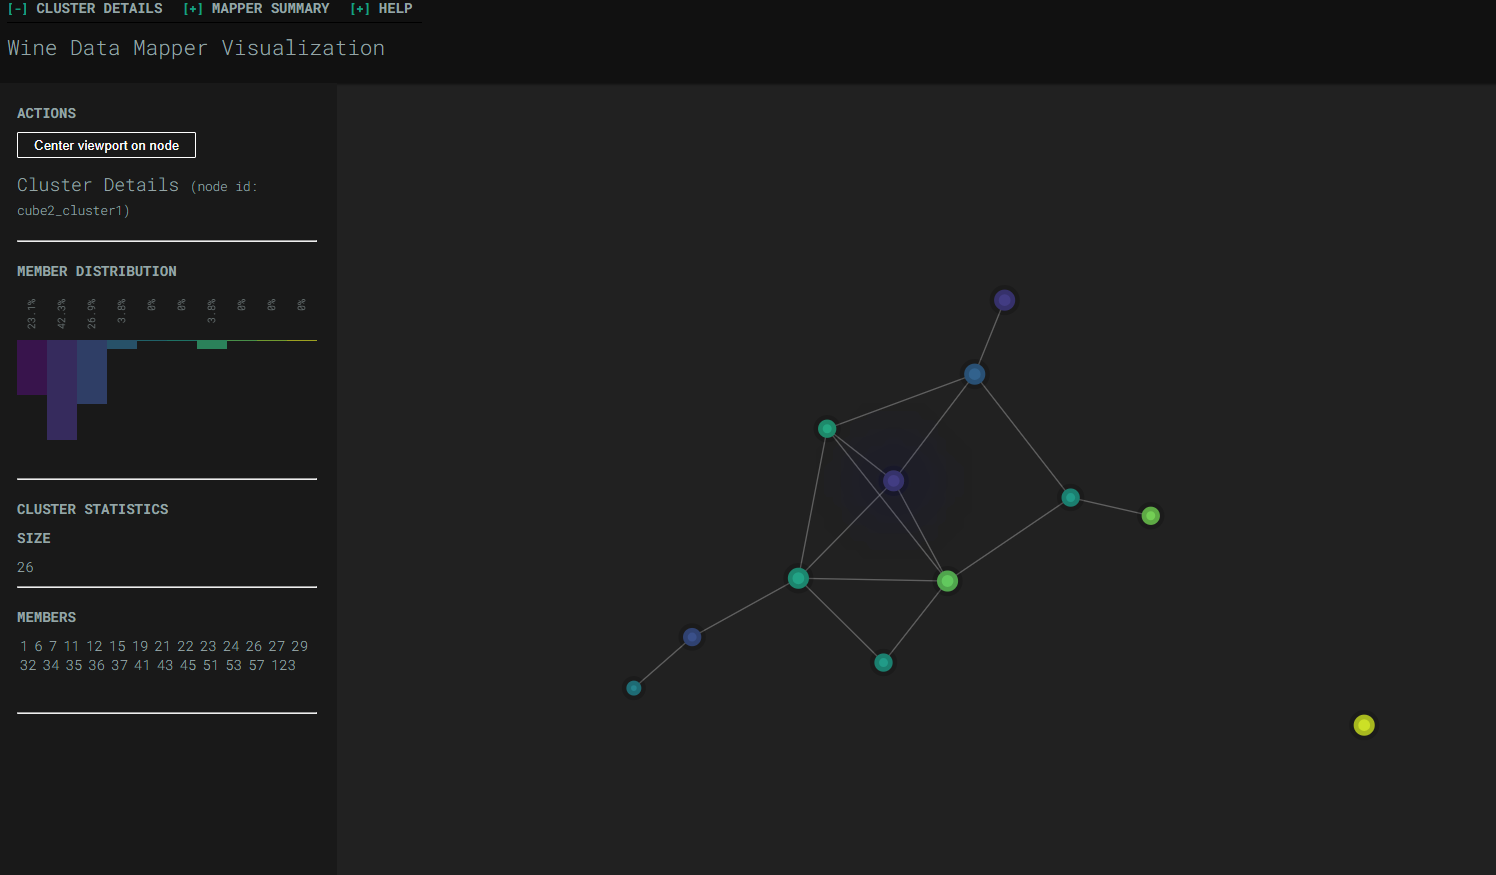

se puede observar en el gráfico 2 componentes conexas y 12 nodos con 16 aristas

In [40]:
node_ids = node_ids = list(graph['nodes'].keys())

for node_id in node_ids:
    # Extraer los índices de los miembros del nodo
    member_indices = graph['nodes'][node_id]

    # Crear DataFrame para cada clúster
    cluster_data = df.iloc[member_indices]

    # Calcular estadísticas descriptivas
    stats_descriptive = cluster_data.describe()

    print(f"clúster {node_id}:\n", stats_descriptive)
    print("\n" + "-"*50 + "\n")

clúster cube0_cluster0:
          Alcohol  Malic_Acid        Ash  Ash_Alcanity   Magnesium  \
count  21.000000   21.000000  21.000000     21.000000   21.000000   
mean   13.327619    3.323810   2.440476     21.666667   97.000000   
std     0.556245    1.141352   0.173074      2.204163   10.109402   
min    12.360000    1.290000   2.100000     18.500000   86.000000   
25%    12.870000    2.580000   2.300000     20.000000   89.000000   
50%    13.320000    3.300000   2.380000     21.500000   95.000000   
75%    13.710000    4.100000   2.600000     23.000000  102.000000   
max    14.340000    5.650000   2.740000     27.000000  120.000000   

       Total_Phenols  Flavanoids  Nonflavanoid_Phenols  Proanthocyanins  \
count      21.000000   21.000000             21.000000        21.000000   
mean        1.808095    0.761429              0.492857         1.389048   
std         0.369792    0.186502              0.070650         0.465424   
min         1.350000    0.510000              0.39000

In [12]:

for node_id in node_ids:
    # Extraer los índices de los miembros del nodo
    member_indices = graph['nodes'][node_id]
    # Crear DataFrame para cada clúster
    cluster_data = df.iloc[member_indices]
    # Calcular correlaciones
    correlations = cluster_data.corr()

    print(f"Correlaciones en el clúster {node_id}:\n", correlations)
    print("\n" + "-"*50 + "\n")

Promedio del clúster cube0_cluster0:
 Alcohol                  13.327619
Malic_Acid                3.323810
Ash                       2.440476
Ash_Alcanity             21.666667
Magnesium                97.000000
Total_Phenols             1.808095
Flavanoids                0.761429
Nonflavanoid_Phenols      0.492857
Proanthocyanins           1.389048
Color_Intensity           9.213333
Hue                       0.624286
OD280                     1.662857
Proline                 670.238095
dtype: float64
Correlaciones en el clúster cube0_cluster0:
                        Alcohol  Malic_Acid       Ash  Ash_Alcanity  Magnesium  \
Alcohol               1.000000   -0.004805  0.466452      0.169990   0.050148   
Malic_Acid           -0.004805    1.000000 -0.036661     -0.103714  -0.052607   
Ash                   0.466452   -0.036661  1.000000      0.796014  -0.001429   
Ash_Alcanity          0.169990   -0.103714  0.796014      1.000000   0.067317   
Magnesium             0.050148   -0.052607

In [36]:
df.columns

Index(['Alcohol', 'Malic_Acid', 'Ash', 'Ash_Alcanity', 'Magnesium',
       'Total_Phenols', 'Flavanoids', 'Nonflavanoid_Phenols',
       'Proanthocyanins', 'Color_Intensity', 'Hue', 'OD280', 'Proline'],
      dtype='object')

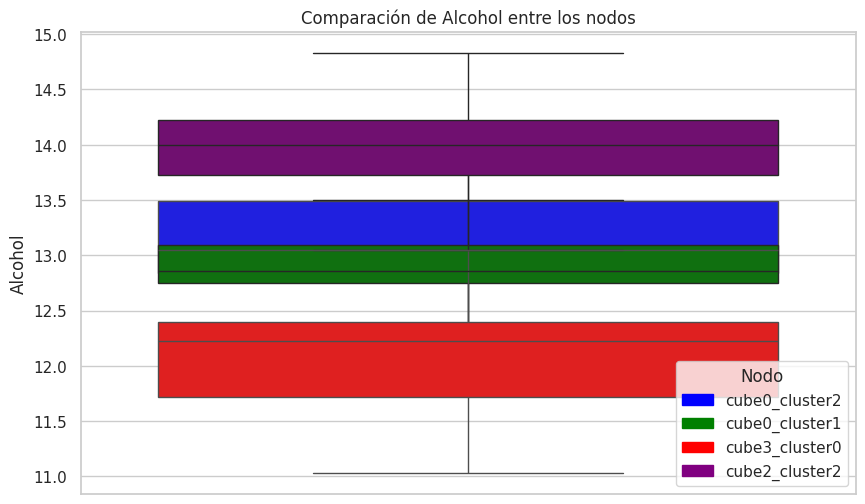

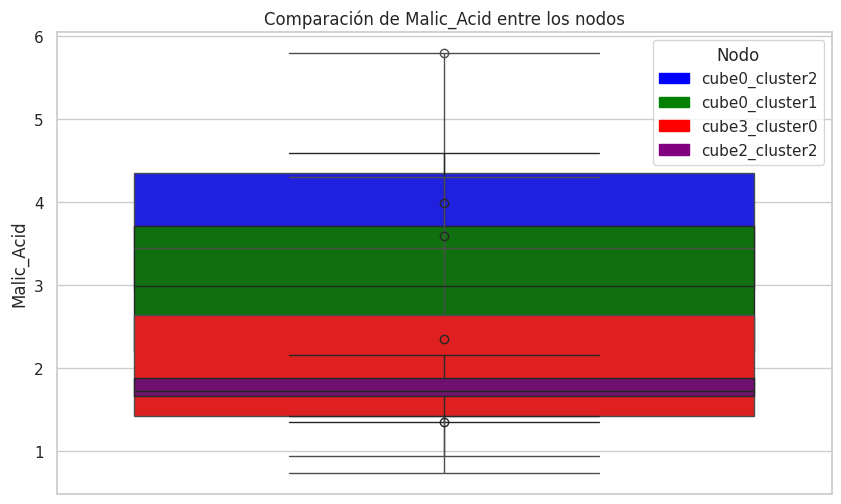

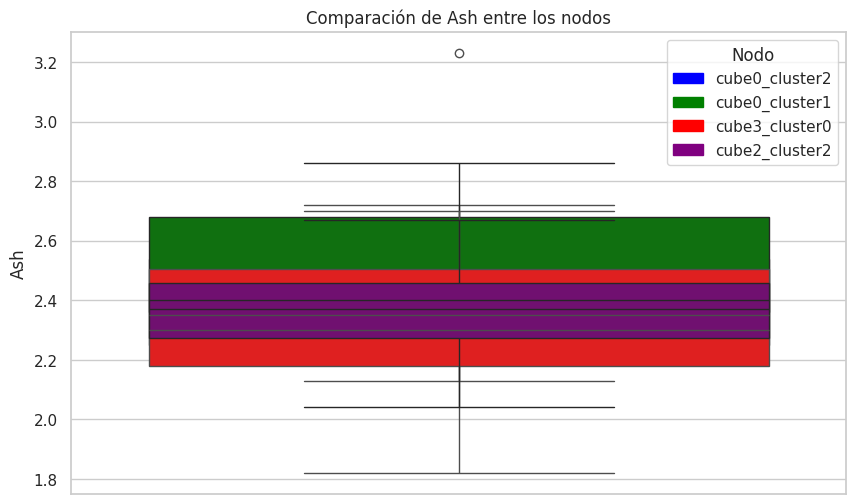

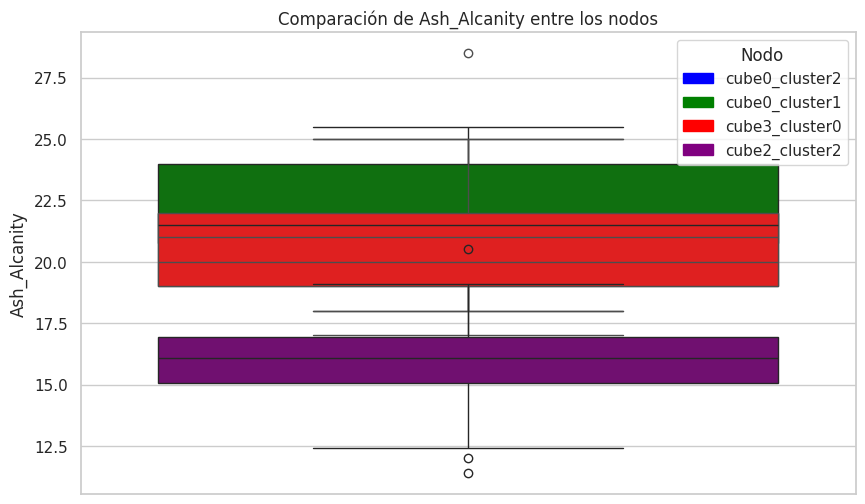

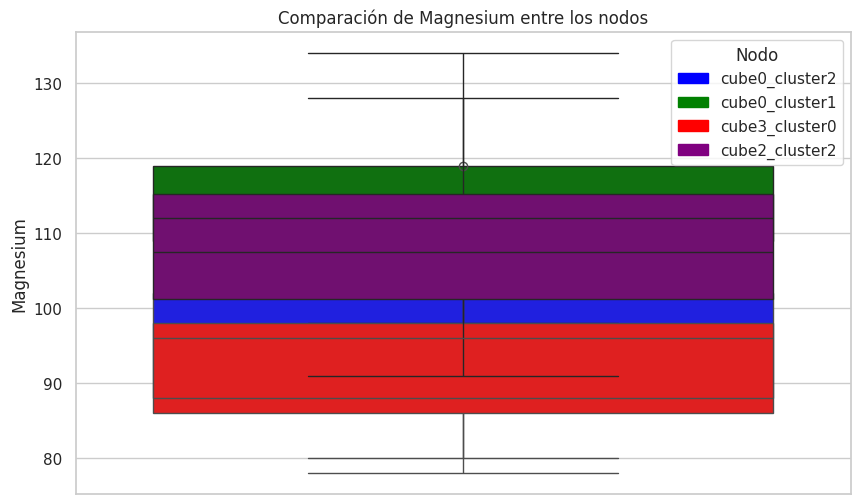

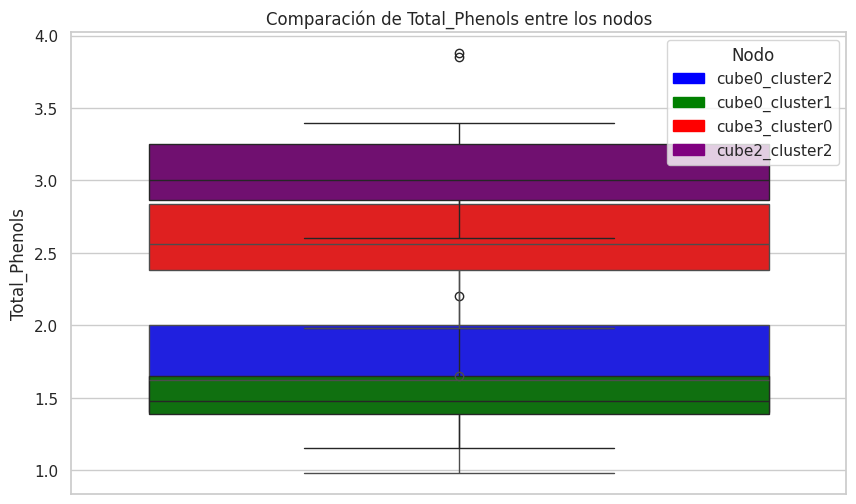

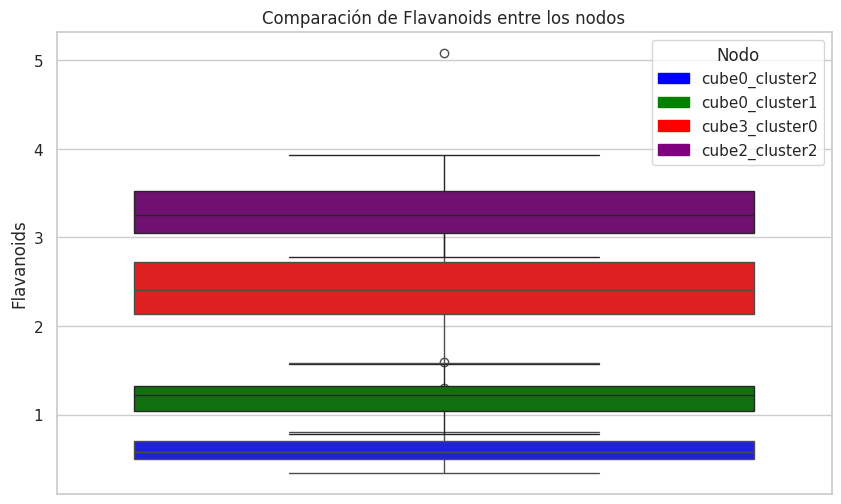

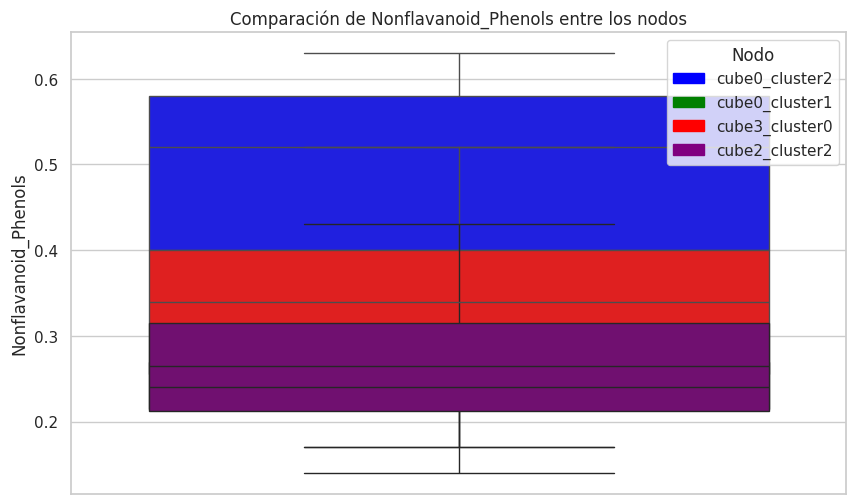

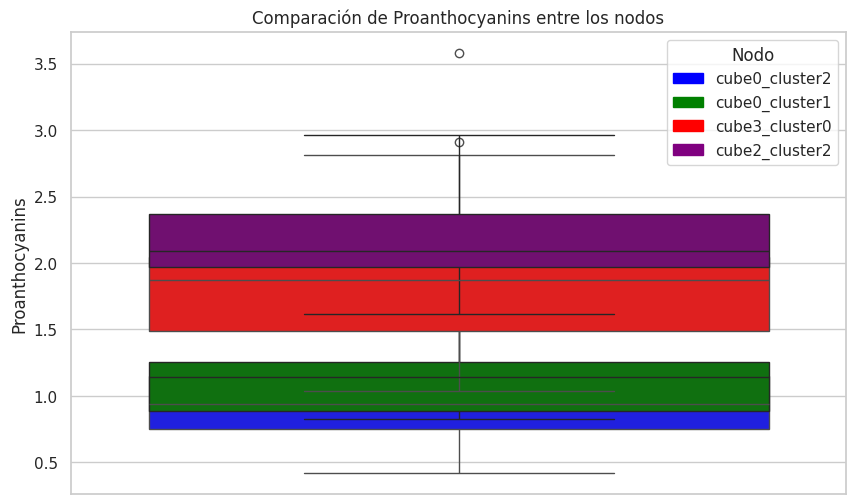

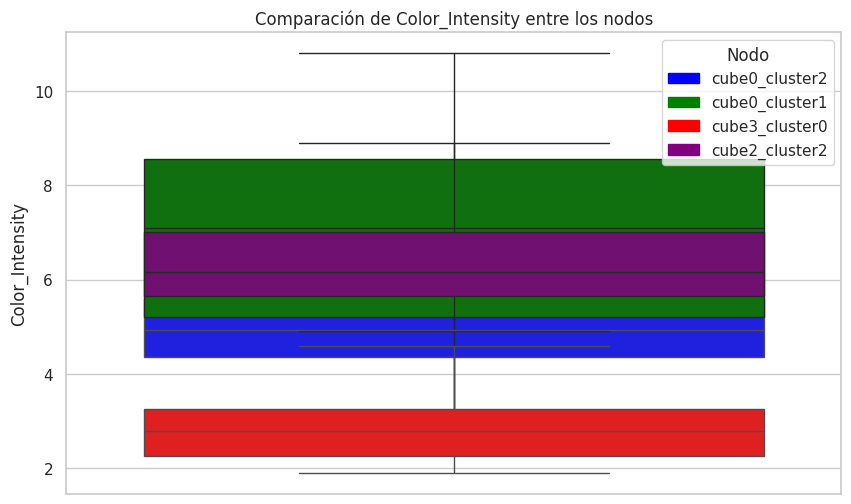

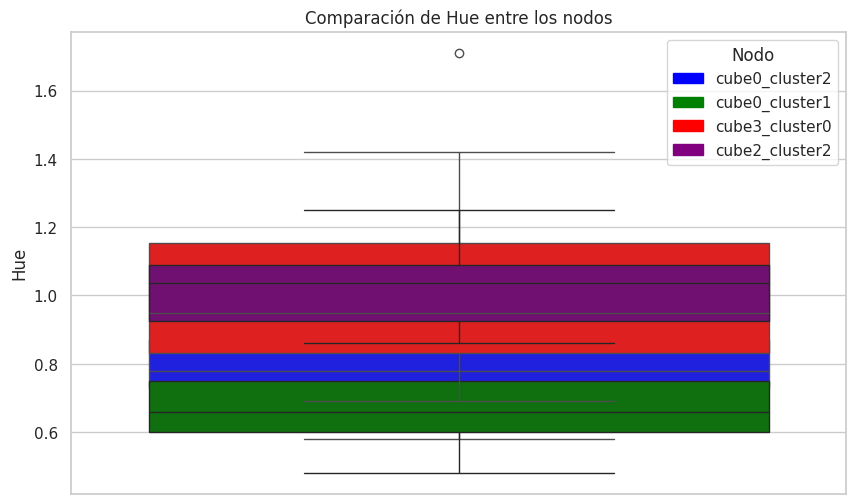

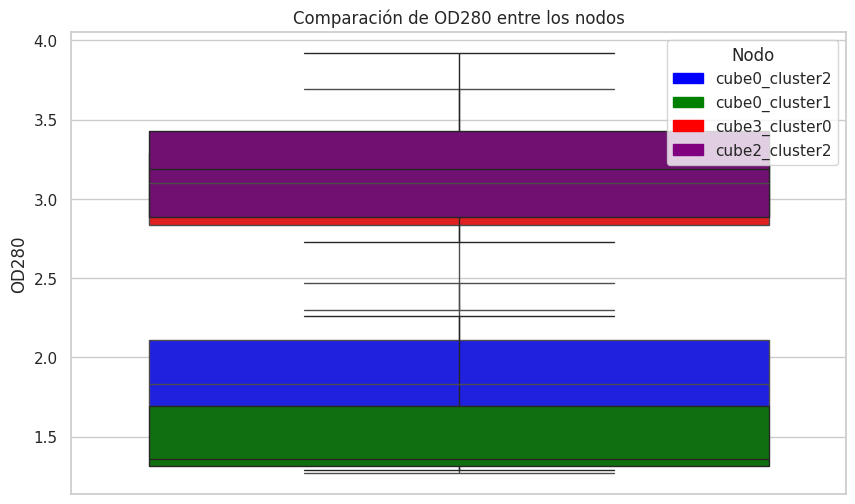

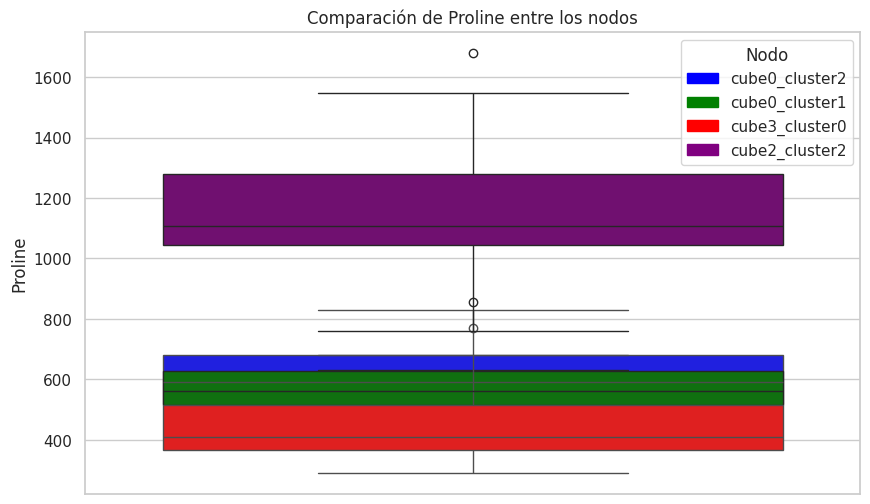

In [26]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from gtda.homology import VietorisRipsPersistence
from gtda.plotting import plot_diagram
import numpy as np
import matplotlib.pyplot as plt
nodes_to_compare = ['cube0_cluster2', 'cube0_cluster1', 'cube3_cluster0', 'cube2_cluster2']
variables = df.columns
data_subsets = {node: df.iloc[graph['nodes'][node]] for node in nodes_to_compare}

# Colores para cada nodo
colors = ['blue', 'green', 'red', 'purple']
labels = list(data_subsets.keys())  # Nombres de los nodos

# Crear un gráfico para cada variable
for variable in variables:
    plt.figure(figsize=(10, 6))
    ax = plt.gca()  # Obtiene el contexto del eje actual

    # Dibuja un boxplot para cada nodo
    for data, color, label in zip(data_subsets.values(), colors, labels):
        sns.boxplot(y=data[variable], color=color, ax=ax)

    # Crear leyenda con un patch para cada color
    patches = [mpatches.Patch(color=color, label=label) for color, label in zip(colors, labels)]
    plt.legend(handles=patches, title='Nodo')

    # Añade título y ajustes al gráfico
    plt.title(f'Comparación de {variable} entre los nodos')
    plt.ylabel(variable)

    plt.show()


/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


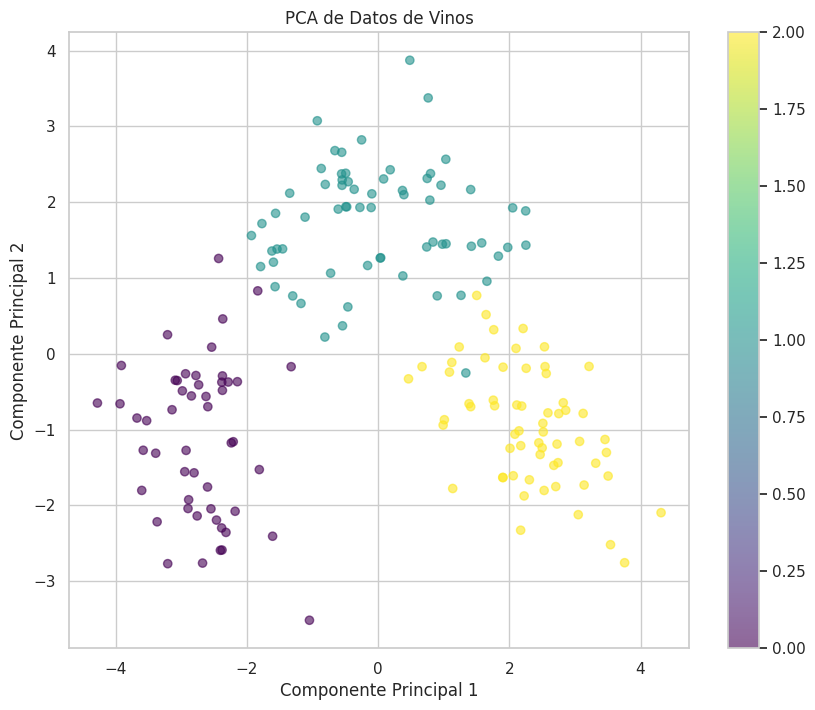

In [18]:
from sklearn.cluster import KMeans

# Aplicar PCA
pca = PCA(n_components=2)
principal_components = pca.fit_transform(df_normalized)

# Crear un DataFrame para los resultados del PCA
pca_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])
kmeans = KMeans(n_clusters=3, random_state=0)
kmeans.fit(df_normalized)
# Añadir las etiquetas de los clústeres para coloración
# Usaremos las etiquetas de K-means como ejemplo, puedes cambiarlo según tus clústeres específicos
pca_df['Cluster'] = kmeans.labels_

# Gráfico de dispersión de los componentes principales
plt.figure(figsize=(10, 8))
scatter = plt.scatter(pca_df['PC1'], pca_df['PC2'], c=pca_df['Cluster'], cmap='viridis', alpha=0.6)
plt.title('PCA de Datos de Vinos')
plt.xlabel('Componente Principal 1')
plt.ylabel('Componente Principal 2')
plt.colorbar(scatter)
plt.show()

In [42]:
# Mostrar las cargas de cada variable en los componentes principales
print("Cargas de PCA (Componente Principal 1 y 2):")
pd.DataFrame(pca.components_, columns=df.columns, index=['PC1', 'PC2'])


Cargas de PCA (Componente Principal 1 y 2):


,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
PC1,0.144329,-0.245188,-0.002051,-0.239320,0.141992,0.394661,0.422934,-0.298533,0.313429,-0.088617,0.296715,0.376167,0.286752
PC2,-0.483652,-0.224931,-0.316069,0.010591,-0.299634,-0.065040,0.003360,-0.028779,-0.039302,-0.529996,0.279235,0.164496,-0.364903
